## 1. Univariate MLP Models

- The MLP model will learn a function that maps a sequence of past observations as input to an output observation. 
- The sequence of observations must be transformed into multiple examples from which the model can learn.

### 1.1.  Data Preparation

In [27]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import Image
from keras.layers import Dense, Input, concatenate
from statsmodels.tsa.seasonal import STL
from keras.callbacks import EarlyStopping
from keras.models import Sequential, Model
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# split a univariate sequence into samples (input and output)
def split_sequence(sequence, n_steps):
    X = [sequence[i:i+n_steps] for i in range(len(sequence) - n_steps)]
    y = [sequence[i+n_steps] for i in range(len(sequence) - n_steps)]
    return np.array(X), np.array(y)


In [28]:
# Define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# Choose a number of time steps
n_steps = 3
# Split into samples: Three time steps are used as input and one time step is used as output (to be predicted)
X, y = split_sequence(raw_seq, n_steps)
# Summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


### 1.2. MLP Model Development

In [29]:
# Define the model
model = Sequential()

# Add a dense (fully connected) layer (single hidden layer) with 100 neurons and ReLU activation function
# input_dim is set to n_steps, the number of input observations
model.add(Dense(100, activation='relu', input_dim=n_steps))

#Note: the model will view each time step as a separate feature instead of separate time steps.

# Add an output layer with a single neuron (single-step forecasting)
model.add(Dense(1))

# Compile the model using Adam optimizer and mean squared error (mse) loss function
model.compile(optimizer='adam', loss='mse')

### 1.3. Model Training

In [30]:
# fit model
model.fit(X, y, epochs=1000, verbose=1)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - loss: 2727.7842
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2577.4070
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2431.0295
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2288.8872
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2151.1440
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2017.7699
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1888.8975
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1764.5060
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1644.6840
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1529.3029
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1418.6483
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1312.7611
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1211.6378
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1115.4352
Epoch 15/1000
1/1 ━━━━━━━━━━

In [31]:
# demonstrate prediction
x_input = np.array([70, 80, 90])
x_input = x_input.reshape((1, n_steps))
yhat = model.predict(x_input, verbose=0)

In [32]:
print(yhat)

[[103.242195]]


In [33]:
# Read the CSV file 'GlobalTemperatures.csv' into a DataFrame.
# The 'parse_dates' parameter is used to convert the 'dt' column to datetime objects.
# The 'index_col' parameter sets the 'dt' column as the index of the DataFrame.
df = pd.read_csv("TemperatureChange_ByCountry.csv", parse_dates=['dt'], index_col='dt')
# Set the frequency of the DataFrame to the start of the month ('MS').
df = df.asfreq('MS')

In [34]:
df.interpolate(method='linear', inplace=True)
df

,India,Japan,Netherlands,World
dt,,,,
1961-01-01,0.536,-0.981,-0.009,0.399
1961-02-01,-1.413,-0.628,4.082,0.263
1961-03-01,0.499,0.600,2.540,0.254
1961-04-01,0.026,0.761,2.735,0.278
1961-05-01,-0.144,0.989,-1.141,0.367
...,...,...,...,...
2019-08-01,0.751,0.903,2.685,1.201
2019-09-01,0.445,1.852,0.767,1.415
2019-10-01,0.267,2.028,1.634,1.545


In [35]:
df['World'].isnull().sum()

0

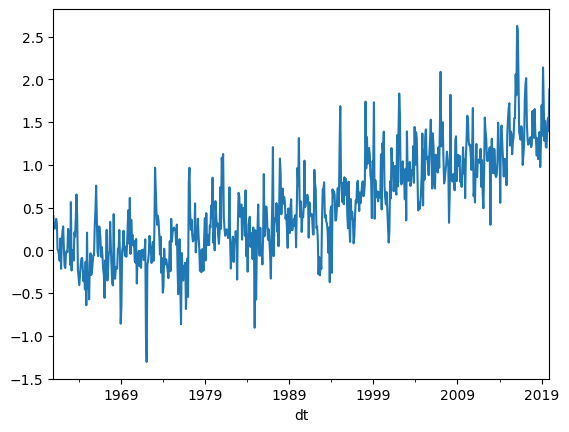

In [37]:
df.World.plot();

In [39]:
X, y = split_sequence(df['World'].tolist(), 24)

In [40]:
X

array([[ 0.399,  0.263,  0.254, ...,  0.25 ,  0.201,  0.113],
       [ 0.263,  0.254,  0.278, ...,  0.201,  0.113, -0.171],
       [ 0.254,  0.278,  0.367, ...,  0.113, -0.171,  0.563],
       ...,
       [ 1.206,  1.235,  1.629, ...,  1.207,  1.201,  1.415],
       [ 1.235,  1.629,  1.349, ...,  1.201,  1.415,  1.545],
       [ 1.629,  1.349,  1.315, ...,  1.415,  1.545,  1.392]])

In [41]:
y

array([-1.710e-01,  5.630e-01, -2.370e-01,  2.000e-03, -2.900e-02,
       -1.200e-01,  2.080e-01,  1.590e-01,  3.740e-01,  6.530e-01,
        3.920e-01, -2.250e-01, -3.110e-01, -4.090e-01, -2.870e-01,
       -1.670e-01, -9.700e-02, -8.900e-02, -2.350e-01, -3.620e-01,
       -2.560e-01, -4.600e-01, -1.350e-01, -6.430e-01,  2.060e-01,
       -4.500e-01, -2.720e-01, -5.740e-01, -1.410e-01, -3.600e-02,
       -2.900e-01, -2.470e-01, -1.460e-01, -5.600e-02, -5.700e-02,
        2.850e-01,  4.580e-01,  7.560e-01,  3.910e-01, -1.800e-02,
       -6.900e-02,  2.790e-01,  2.700e-01,  1.590e-01, -7.600e-02,
        3.900e-02, -6.300e-02, -2.180e-01, -2.890e-01, -5.570e-01,
       -1.170e-01, -1.740e-01,  2.380e-01, -3.540e-01, -2.140e-01,
       -2.800e-02, -1.600e-02,  3.320e-01,  2.500e-02, -2.080e-01,
       -3.930e-01, -4.120e-01,  4.230e-01, -1.370e-01, -3.330e-01,
       -2.170e-01, -1.950e-01, -2.150e-01,  1.900e-02, -7.000e-03,
        2.370e-01, -7.500e-02, -8.590e-01, -6.580e-01, -1.800e

In [43]:
df.World.head(25)

dt
1961-01-01    0.399
1961-02-01    0.263
1961-03-01    0.254
1961-04-01    0.278
1961-05-01    0.367
1961-06-01    0.313
1961-07-01    0.007
1961-08-01   -0.001
1961-09-01   -0.063
1961-10-01   -0.123
1961-11-01    0.138
1961-12-01   -0.217
1962-01-01    0.104
1962-02-01    0.218
1962-03-01    0.279
1962-04-01    0.027
1962-05-01   -0.183
1962-06-01   -0.208
1962-07-01   -0.035
1962-08-01   -0.007
1962-09-01   -0.023
1962-10-01    0.250
1962-11-01    0.201
1962-12-01    0.113
1963-01-01   -0.171
Freq: MS, Name: World, dtype: float64

In [44]:
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)   # 60% training, 20% testing, and 20% validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [45]:
# Set the random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Define the model
model_1 = Sequential()

# Add a dense (fully connected) layer (single hidden layer) with 100 neurons and ReLU activation function
# input_dim is set to n_steps, the number of input observations
model_1.add(Dense(100, activation='relu', input_dim=24))

#Note: the model will view each time step as a separate feature instead of separate time steps.

# Add an output layer with a single neuron (single-step forecasting)
model_1.add(Dense(1))

# Compile the model using Adam optimizer and mean squared error (mse) loss function
model_1.compile(optimizer='adam', loss='mse')

C:\Users\yuta\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
# fit model
history_1 = model_1.fit(X_train, y_train, epochs=2000, verbose=1, validation_data=(X_val, y_val))

Epoch 1/2000


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5835 - val_loss: 0.2122
Epoch 2/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2175 - val_loss: 0.1215
Epoch 3/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1433 - val_loss: 0.1147
Epoch 4/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1271 - val_loss: 0.1124
Epoch 5/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1192 - val_loss: 0.1030
Epoch 6/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1100 - val_loss: 0.1013
Epoch 7/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1037 - val_loss: 0.0972
Epoch 8/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0997 - val_loss: 0.0971
Epoch 9/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0965 - val_loss: 0.0957
Epoch 10/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0945 - val_loss: 0.0959
Epoch 11/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0930 - val_loss: 0.0961
Epoch 12/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.09

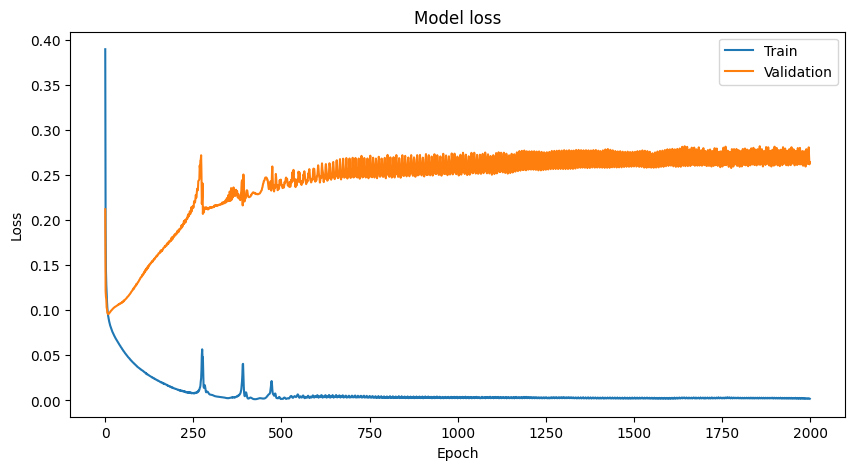

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step


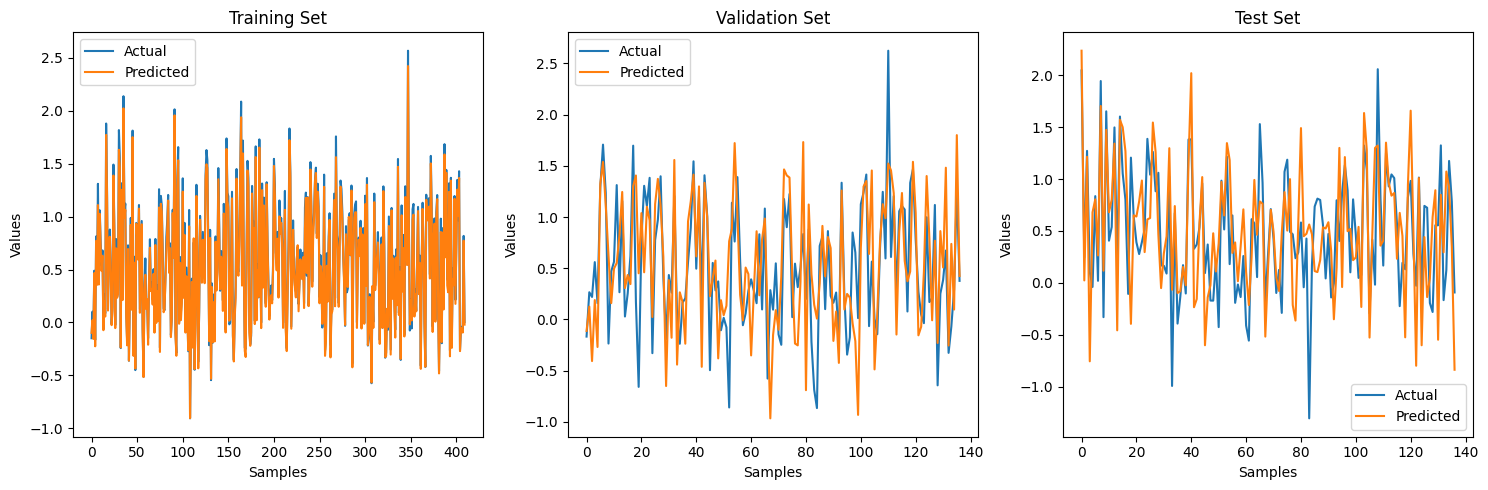

In [50]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Predict values
y_train_pred = model_1.predict(X_train)
y_val_pred = model_1.predict(X_val)
y_test_pred = model_1.predict(X_test)

# Plot predictions vs actual values
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.plot(y_train, label='Actual')
plt.plot(y_train_pred, label='Predicted')
plt.title('Training Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Validation set
plt.subplot(1, 3, 2)
plt.plot(y_val, label='Actual')
plt.plot(y_val_pred, label='Predicted')
plt.title('Validation Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Test set
plt.subplot(1, 3, 3)
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Predicted')
plt.title('Test Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4157 - val_loss: 0.2528
Epoch 2/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1851 - val_loss: 0.1394
Epoch 3/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1220 - val_loss: 0.1296
Epoch 4/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1084 - val_loss: 0.1282
Epoch 5/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1047 - val_loss: 0.1170
Epoch 6/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0999 - val_loss: 0.1146
Epoch 7/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0965 - val_loss: 0.1092
Epoch 8/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0939 - val_loss: 0.1084
Epoch 9/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0918 - val_loss: 0.1062
Epoch 10/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0901 - val_loss: 0.1056
Epoch 11/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0886 - val_loss: 0.1048
Epoch 12/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

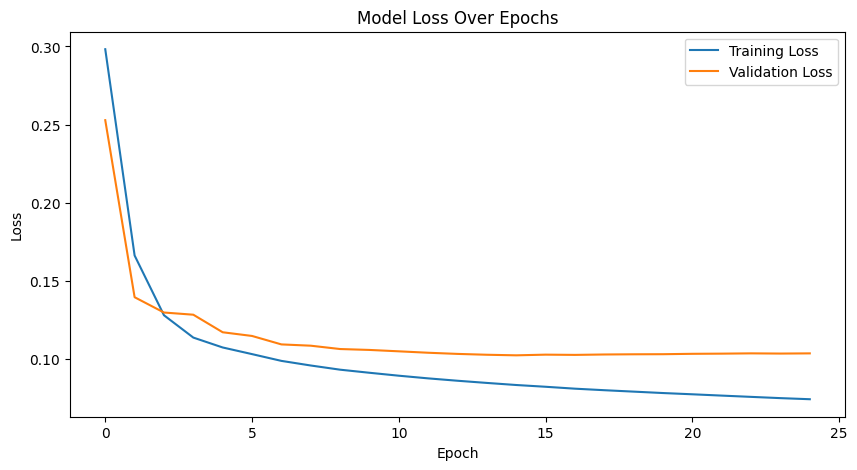

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step


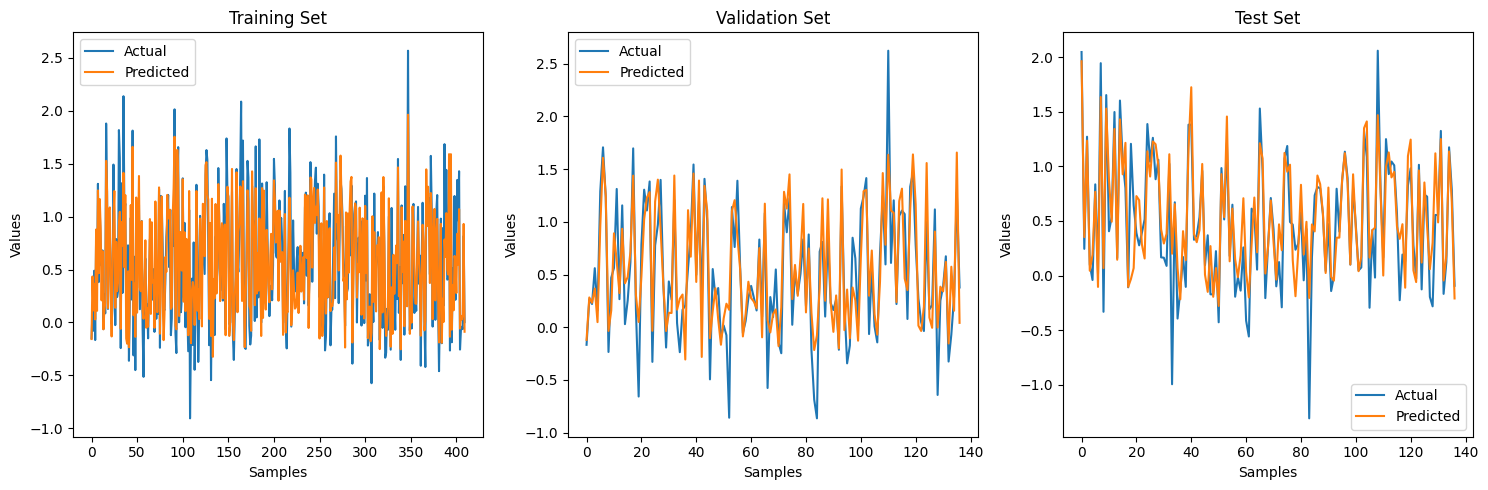

In [54]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define the model
model_2 = Sequential()

# Add a dense (fully connected) layer (single hidden layer) with 100 neurons and ReLU activation function
# input_dim is set to n_steps, the number of input observations
model_2.add(Dense(100, activation='relu', input_dim=24))

#Note: the model will view each time step as a separate feature instead of separate time steps.

# Add an output layer with a single neuron (single-step forecasting)
model_2.add(Dense(1))

# Compile the model using Adam optimizer and mean squared error (mse) loss function
model_2.compile(optimizer='adam', loss='mse')

# Fit the model with EarlyStopping
history_2 = model_2.fit(X_train, y_train, epochs=2000, verbose=1, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Predict values
y_train_pred = model_2.predict(X_train)
y_val_pred = model_2.predict(X_val)
y_test_pred = model_2.predict(X_test)

# Plot predictions vs actual values
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.plot(y_train, label='Actual')
plt.plot(y_train_pred, label='Predicted')
plt.title('Training Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Validation set
plt.subplot(1, 3, 2)
plt.plot(y_val, label='Actual')
plt.plot(y_val_pred, label='Predicted')
plt.title('Validation Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Test set
plt.subplot(1, 3, 3)
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Predicted')
plt.title('Test Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

### 

In [55]:
# Function to print MAE for training, validation, and testing sets
def print_mae(model, X_train, y_train, X_val, y_val, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    print(f'Training MAE: {train_mae}')
    print(f'Validation MAE: {val_mae}')
    print(f'Test MAE: {test_mae}')

### 1.4. Model Assessment

In [56]:
# Print the MAE for the training, validation, and testing sets
print_mae(model_1, X_train, y_train, X_val, y_val, X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step
Training MAE: 0.05466943599894279
Validation MAE: 0.4083178103068014
Test MAE: 0.41729895746620904


In [57]:
# Print the MAE for the training, validation, and testing sets
print_mae(model_2, X_train, y_train, X_val, y_val, X_test, y_test)
# Model 2 with less computational time and less epochs has small MAE for testing and validation

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
Training MAE: 0.2191286891030647
Validation MAE: 0.24644132005330852
Test MAE: 0.21503140332990317


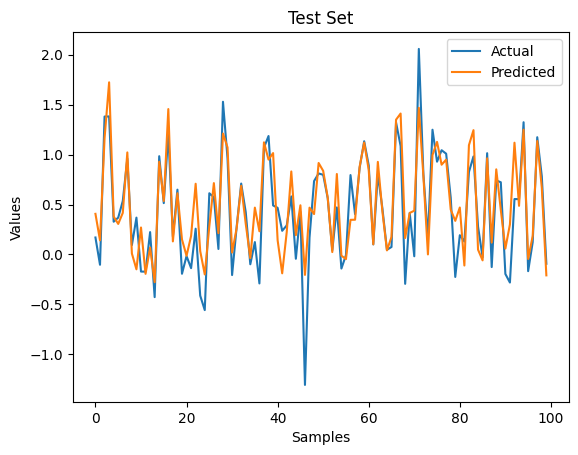

In [58]:
# Test set
plt.plot(y_test [-100:], label='Actual')
plt.plot(y_test_pred[-100:], label='Predicted')
plt.title('Test Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend();

## 2. Multivariate MLP Models
### 2.1 Multiple Input Series

In [59]:
from numpy import hstack

# Define input sequences
in_seq1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = np.array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# Convert sequences to a [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
print(in_seq1)
print('=' * 20)
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# Horizontally stack columns to create the dataset
dataset = hstack((in_seq1, in_seq2, out_seq))

print(dataset)

[[10]
 [20]
 [30]
 [40]
 [50]
 [60]
 [70]
 [80]
 [90]]
[[ 10  15  25]
 [ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]]


In [60]:
# Function to split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences) - n_steps + 1):
        end_ix = i + n_steps
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [61]:
# Choose a number of time steps
n_steps = 3

# Convert the dataset into input/output samples
X, y = split_sequences(dataset, n_steps)

# Print the shapes of the resulting arrays
print("Input shape:", X.shape)   
print("Output shape:", y.shape)

# nput Shape: (7, 3, 2)
    # 7: Number of samples (or sequences).
    # 3: Number of time steps in each sample.
    # 2: Number of features in each time step.
# Output Shape: (7,)
    # 7: Number of target values corresponding to the 7 input samples.

# Summarize the data by printing each input/output pair
for i in range(len(X)):
    print("X[%d]:\n%s, \ny[%d]: %s" % (i, X[i], i, y[i]))
    print('=' * 20)

Input shape: (7, 3, 2)
Output shape: (7,)
X[0]:
[[10 15]
 [20 25]
 [30 35]], 
y[0]: 65
X[1]:
[[20 25]
 [30 35]
 [40 45]], 
y[1]: 85
X[2]:
[[30 35]
 [40 45]
 [50 55]], 
y[2]: 105
X[3]:
[[40 45]
 [50 55]
 [60 65]], 
y[3]: 125
X[4]:
[[50 55]
 [60 65]
 [70 75]], 
y[4]: 145
X[5]:
[[60 65]
 [70 75]
 [80 85]], 
y[5]: 165
X[6]:
[[70 75]
 [80 85]
 [90 95]], 
y[6]: 185


### MLP model

In [62]:
# Before we can fit an MLP on this data, we must flatten the shape of the input samples. 
# MLPs require that the shape of the input portion of each sample is a vector.
# flatten input
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))

In [63]:
X

array([[10, 15, 20, 25, 30, 35],
       [20, 25, 30, 35, 40, 45],
       [30, 35, 40, 45, 50, 55],
       [40, 45, 50, 55, 60, 65],
       [50, 55, 60, 65, 70, 75],
       [60, 65, 70, 75, 80, 85],
       [70, 75, 80, 85, 90, 95]])

In [64]:
# Set the random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_input))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)

C:\Users\yuta\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
# demonstrate prediction
x_input = np.array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, n_input))
# 100 + 105 = 205
yhat = model.predict(x_input, verbose=0)

In [66]:
yhat

array([[211.27539]], dtype=float32)

### 2.1.2 Multi-headed MILP
- There is another, more elaborate way to model the problem. Each input series can be handled by a separate MLP, and the output of each of these submodels can be combined before making a prediction for the output sequence.
  
- We can refer to this as a multi-headed input MLP model. It may offer more flexibility or better performance depending on the specifics of the problem being modeled.

In [67]:
# convert into input/output
X, y = split_sequences(dataset, n_steps)

In [68]:
X, y

(array([[[10, 15],
         [20, 25],
         [30, 35]],
 
        [[20, 25],
         [30, 35],
         [40, 45]],
 
        [[30, 35],
         [40, 45],
         [50, 55]],
 
        [[40, 45],
         [50, 55],
         [60, 65]],
 
        [[50, 55],
         [60, 65],
         [70, 75]],
 
        [[60, 65],
         [70, 75],
         [80, 85]],
 
        [[70, 75],
         [80, 85],
         [90, 95]]]),
 array([ 65,  85, 105, 125, 145, 165, 185]))

In [69]:
X1 = X[:, :, 0]
X2 = X[:, :, 1]

In [70]:
X1

array([[10, 20, 30],
       [20, 30, 40],
       [30, 40, 50],
       [40, 50, 60],
       [50, 60, 70],
       [60, 70, 80],
       [70, 80, 90]])

In [71]:
X2

array([[15, 25, 35],
       [25, 35, 45],
       [35, 45, 55],
       [45, 55, 65],
       [55, 65, 75],
       [65, 75, 85],
       [75, 85, 95]])

In [72]:
# Define the number of time steps
n_steps = 3

# First input model
visible1 = Input(shape=(n_steps,))
dense1 = Dense(100, activation='relu')(visible1)

# Second input model
visible2 = Input(shape=(n_steps,))
dense2 = Dense(100, activation='relu')(visible2)

# Merge input models
merged = concatenate([dense1, dense2])
output = Dense(1)(merged)

# Create and compile the model
model = Model(inputs=[visible1, visible2], outputs=output)
model.compile(optimizer='adam', loss='mse')

# Fit the model
# X1 and X2 are the two input datasets, y is the target dataset
model.fit([X1, X2], y, epochs=2000, verbose=0)

# Demonstrate prediction
# Example input data for prediction
x_input = np.array([[80, 85], [90, 95], [100, 105]])

# Split input data into two separate inputs for the model
x1 = x_input[:, 0].reshape((1, n_steps))
x2 = x_input[:, 1].reshape((1, n_steps))

# Predict using the trained model
yhat = model([x1, x2])
print(yhat)

tf.Tensor([[205.81679]], shape=(1, 1), dtype=float32)


### 2.2 Multiple Parallel Series for MLP
- An alternate time series problem is the case where there are multiple parallel time series and a
value must be predicted for each.
- We may want to predict the value for each of the three time series for the next time step. This might be referred to as __multivariate forecasting__.

In [73]:
def split_sequences(sequences, n_steps):
    X, y = [], []
    for i in range(len(sequences) - n_steps):
        end_ix = i + n_steps
        # Extract input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [74]:
# define input sequence
in_seq1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = np.array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])
    print('=' * 20)

# Input Shape (7, 3, 2):
    # 7: Number of samples (or sequences).
    # 3: Number of time steps in each sample.
    # 2: Number of features in each time step.
# Output Shape (7,):
    # 7: Number of target values corresponding to the 7 input samples.

(6, 3, 3) (6, 3)
[[10 15 25]
 [20 25 45]
 [30 35 65]] [40 45 85]
[[20 25 45]
 [30 35 65]
 [40 45 85]] [ 50  55 105]
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]] [ 60  65 125]
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]] [ 70  75 145]
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]] [ 80  85 165]
[[ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]] [ 90  95 185]


- We must flatten the three dimensional structure of the input data samples to a two 
dimensional structure of [samples, features], where lag observations are treated as feature 
by the model

### 2.2.1 Vector-Output MLP Model

In [75]:
y

array([[ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])

In [76]:
# flatten input
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))

In [77]:
X

array([[ 10,  15,  25,  20,  25,  45,  30,  35,  65],
       [ 20,  25,  45,  30,  35,  65,  40,  45,  85],
       [ 30,  35,  65,  40,  45,  85,  50,  55, 105],
       [ 40,  45,  85,  50,  55, 105,  60,  65, 125],
       [ 50,  55, 105,  60,  65, 125,  70,  75, 145],
       [ 60,  65, 125,  70,  75, 145,  80,  85, 165]])

In [78]:
# The model output will be a vector, with one element for each of the three different time series.
n_output = y.shape[1]
n_output

3

In [79]:
# Set the random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_input))
model.add(Dense(n_output))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=2000, verbose=0)

# demonstrate prediction
x_input = np.array([[70,75,145], [80,85,165], [90,95,185]])
x_input = x_input.reshape((1, n_input))
yhat = model([x_input])
print(yhat)

tf.Tensor([[101.02395 105.58268 206.79393]], shape=(1, 3), dtype=float32)


### 2.2.2 Multi-output MLP Model
- As with multiple input series, there is another, more elaborate way to model the problem. 
- Each 
output series can be handled by a separate output MLP model.

In [81]:
# Display an image file
# Image(filename='Multi-outputMLP.png')

In [82]:
y

array([[ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])

In [83]:
# separate output
y1 = y[:, 0].reshape((y.shape[0], 1))
y2 = y[:, 1].reshape((y.shape[0], 1))
y3 = y[:, 2].reshape((y.shape[0], 1))

In [84]:
y1

array([[40],
       [50],
       [60],
       [70],
       [80],
       [90]])

In [85]:
# define model
visible = Input(shape=(n_input,))
dense = Dense(100, activation='relu')(visible)
# define output 1
output1 = Dense(1)(dense)
# define output 2
output2 = Dense(1)(dense)
# define output 2
output3 = Dense(1)(dense)
# tie together
model = Model(inputs=visible, outputs=[output1, output2, output3])
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, [y1,y2,y3], epochs=2000, verbose=0)
# demonstrate prediction
x_input = np.array([[70,75,145], [80,85,165], [90,95,185]])
x_input = x_input.reshape((1, n_input))
yhat = model([x_input])
print(yhat)

[<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[100.88945]], dtype=float32)>, <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[105.87493]], dtype=float32)>, <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[206.36508]], dtype=float32)>]


## 3. Muti-step MLP Models

In [86]:
# The MLP can output a vector directly that can be interpreted as a multi-step forecast.
# Function to split a univariate sequence into input/output samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(sequence) - n_steps_in - n_steps_out + 1):
        # Define the end of the input sequence
        end_ix = i + n_steps_in
        # Define the end of the output sequence
        out_end_ix = end_ix + n_steps_out
        # Extract input and output sequences
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [87]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)

In [88]:
X

array([[10, 20, 30],
       [20, 30, 40],
       [30, 40, 50],
       [40, 50, 60],
       [50, 60, 70]])

In [89]:
y

array([[40, 50],
       [50, 60],
       [60, 70],
       [70, 80],
       [80, 90]])

In [90]:
# Set the random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps_in))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=2000, verbose=0)
# demonstrate prediction
x_input = np.array([70, 80, 90])
x_input = x_input.reshape((1, n_steps_in))
yhat = model([x_input])
print(yhat)

tf.Tensor([[103.81224 115.30897]], shape=(1, 2), dtype=float32)


## 4. Multivariate Multi-step MLP Models

### 4.1 Multiple Input Multi-step Output

In [91]:
# Function to split a multivariate sequence into input/output samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(sequences) - n_steps_in - n_steps_out + 1):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # Extract input and output sequences
        seq_x = sequences[i:end_ix, :-1]
        seq_y = sequences[end_ix:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [92]:
# [[ 10 15 25]
# [ 20 25 45]
# [ 30 35 65]
# [ 40 45 85]
# [ 50 55 105]
# [ 60 65 125]
# [ 70 75 145]
# [ 80 85 165]
# [ 90 95 185]]

# Define input sequences
in_seq1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = np.array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# Convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# Horizontally stack columns to create the dataset
dataset = np.hstack((in_seq1, in_seq2, out_seq))

# Define the number of time steps for input and output
n_steps_in, n_steps_out = 3, 2

# Convert the dataset into input/output samples
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

# Print the shapes of the resulting arrays
print("Input shape:", X.shape)
print("Output shape:", y.shape)

# Summarize the data by printing each input/output pair
for i in range(len(X)):
    print(f"X[{i}]:\n{X[i]}, y[{i}]: {y[i]}")
    print('=' * 30)

Input shape: (5, 3, 2)
Output shape: (5, 2)
X[0]:
[[10 15]
 [20 25]
 [30 35]], y[0]: [ 85 105]
X[1]:
[[20 25]
 [30 35]
 [40 45]], y[1]: [105 125]
X[2]:
[[30 35]
 [40 45]
 [50 55]], y[2]: [125 145]
X[3]:
[[40 45]
 [50 55]
 [60 65]], y[3]: [145 165]
X[4]:
[[50 55]
 [60 65]
 [70 75]], y[4]: [165 185]


In [93]:
# flatten input
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))
X

array([[10, 15, 20, 25, 30, 35],
       [20, 25, 30, 35, 40, 45],
       [30, 35, 40, 45, 50, 55],
       [40, 45, 50, 55, 60, 65],
       [50, 55, 60, 65, 70, 75]])

In [94]:
# Set the random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_input))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=2000, verbose=0)
# Demonstrate prediction
x_input = np.array([[70, 75], [80, 85], [90, 95]])
x_input = x_input.reshape((1, n_input))
yhat = model([x_input])
print(yhat)
# 100 + 105 = 205
# 205 + 20 = 225

tf.Tensor([[212.38025 236.62508]], shape=(1, 2), dtype=float32)


### 4.2 Multiple Parallel Input and Multi-step Output

In [95]:
# We may use the last three time steps from each of the three time series as input to the model.
# Then, predict the next time steps of each of the three time series as output. 

# [[ 10 15 25]
# [ 20 25 45]
# [ 30 35 65]
# [ 40 45 85]
# [ 50 55 105]
# [ 60 65 125]
# [ 70 75 145]
# [ 80 85 165]
# [ 90 95 185]]

# Input:
    # 10, 15, 25
    # 20, 25, 45
    # 30, 35, 65

# Output:
    # 40, 45, 85
    # 50, 55, 105

In [96]:
# Function to split a multivariate sequence into input/output samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(sequences) - n_steps_in - n_steps_out + 1):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # Extract input and output parts of the pattern
        seq_x = sequences[i:end_ix, :]
        seq_y = sequences[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [97]:
# Define input sequences
in_seq1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = np.array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# Convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# Horizontally stack columns to create the dataset
dataset = np.hstack((in_seq1, in_seq2, out_seq))

# Choose the number of time steps
n_steps_in, n_steps_out = 3, 2

# Convert dataset into input/output samples
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

# Print the shapes of the resulting arrays
print("Input shape:", X.shape)
print("Output shape:", y.shape)

# Summarize the data by printing each input/output pair
for i in range(len(X)):
    print('='* 30)
    print(f"X[{i}]:\n{X[i]}, \ny[{i}]:\n{y[i]}")

Input shape: (5, 3, 3)
Output shape: (5, 2, 3)
X[0]:
[[10 15 25]
 [20 25 45]
 [30 35 65]], 
y[0]:
[[ 40  45  85]
 [ 50  55 105]]
X[1]:
[[20 25 45]
 [30 35 65]
 [40 45 85]], 
y[1]:
[[ 50  55 105]
 [ 60  65 125]]
X[2]:
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]], 
y[2]:
[[ 60  65 125]
 [ 70  75 145]]
X[3]:
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]], 
y[3]:
[[ 70  75 145]
 [ 80  85 165]]
X[4]:
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]], 
y[4]:
[[ 80  85 165]
 [ 90  95 185]]


In [98]:
# flatten input
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))
# flatten output
n_output = y.shape[1] * y.shape[2]
y = y.reshape((y.shape[0], n_output))

In [99]:
X

array([[ 10,  15,  25,  20,  25,  45,  30,  35,  65],
       [ 20,  25,  45,  30,  35,  65,  40,  45,  85],
       [ 30,  35,  65,  40,  45,  85,  50,  55, 105],
       [ 40,  45,  85,  50,  55, 105,  60,  65, 125],
       [ 50,  55, 105,  60,  65, 125,  70,  75, 145]])

In [100]:
y

array([[ 40,  45,  85,  50,  55, 105],
       [ 50,  55, 105,  60,  65, 125],
       [ 60,  65, 125,  70,  75, 145],
       [ 70,  75, 145,  80,  85, 165],
       [ 80,  85, 165,  90,  95, 185]])

In [101]:
# Set the random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_input))
model.add(Dense(n_output))
model.compile(optimizer='adam', loss='mse')
# Fit model
model.fit(X, y, epochs=2000, verbose=0)
# Demonstrate prediction
x_input = np.array([[60, 65, 125], [70, 75, 145], [80, 85, 165]])
x_input = x_input.reshape((1, n_input))
yhat = model([x_input])
print(yhat)

tf.Tensor([[ 89.91349   94.915504 185.40033   99.691475 104.81329  206.90361 ]], shape=(1, 6), dtype=float32)


In [103]:
df = pd.read_csv('TemperatureChange_ByCountry.csv')
df = df.set_index('dt')
df.index = pd.to_datetime(df.index)
df.head()

,India,Japan,Netherlands,World
dt,,,,
1961-01-01,0.536,-0.981,-0.009,0.399
1961-02-01,-1.413,-0.628,4.082,0.263
1961-03-01,0.499,0.600,2.540,0.254
1961-04-01,0.026,0.761,2.735,0.278
1961-05-01,-0.144,0.989,-1.141,0.367


In [104]:
# Sort the DataFrame by the datetime index
df = df.sort_index()

# Display the first few rows of the sorted DataFrame
df.head()

,India,Japan,Netherlands,World
dt,,,,
1961-01-01,0.536,-0.981,-0.009,0.399
1961-02-01,-1.413,-0.628,4.082,0.263
1961-03-01,0.499,0.600,2.540,0.254
1961-04-01,0.026,0.761,2.735,0.278
1961-05-01,-0.144,0.989,-1.141,0.367


In [105]:
df.tail()

,India,Japan,Netherlands,World
dt,,,,
2019-08-01,0.751,0.903,2.685,1.201
2019-09-01,0.445,1.852,0.767,1.415
2019-10-01,0.267,2.028,1.634,1.545
2019-11-01,1.389,0.718,0.700,1.392
2019-12-01,0.181,1.343,2.835,1.880


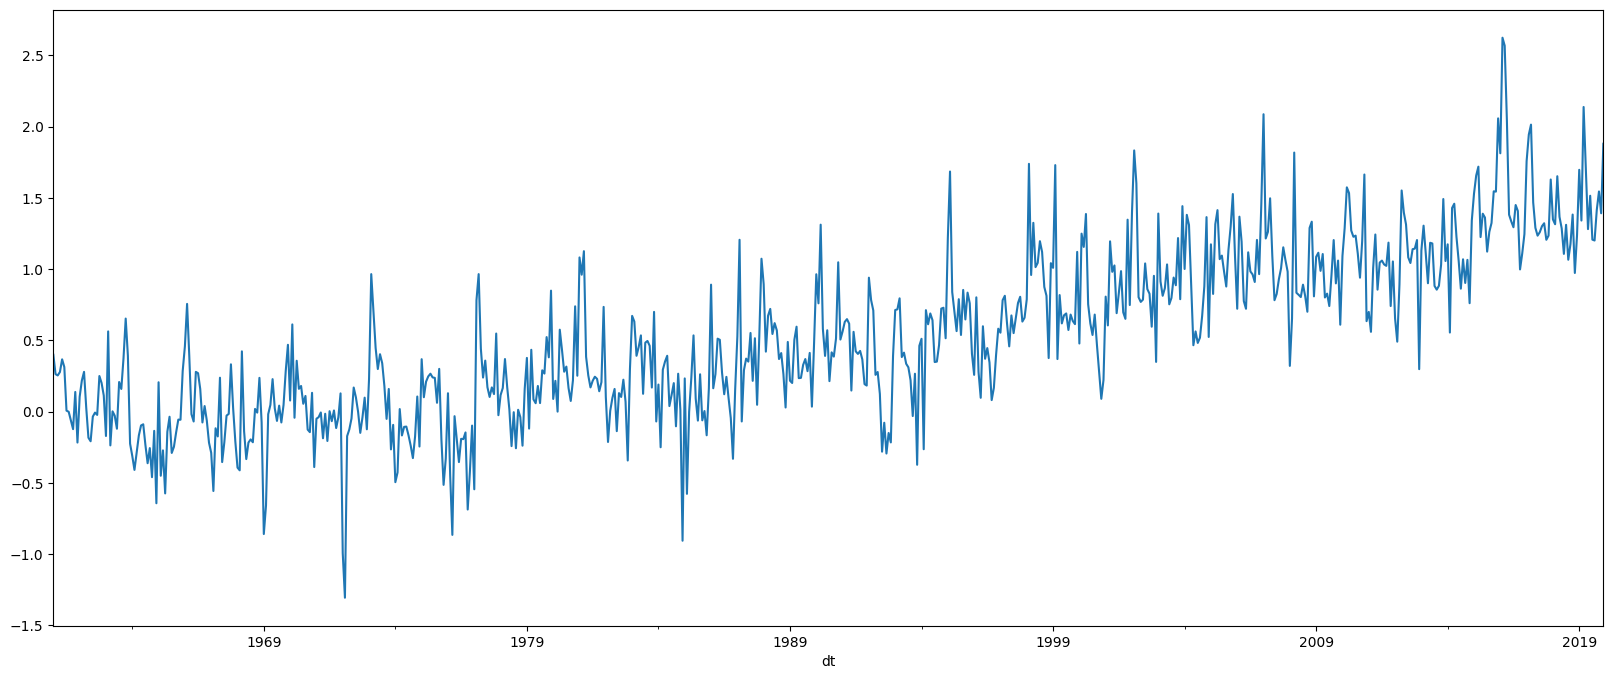

In [107]:
df.World.plot(figsize=(20, 8));

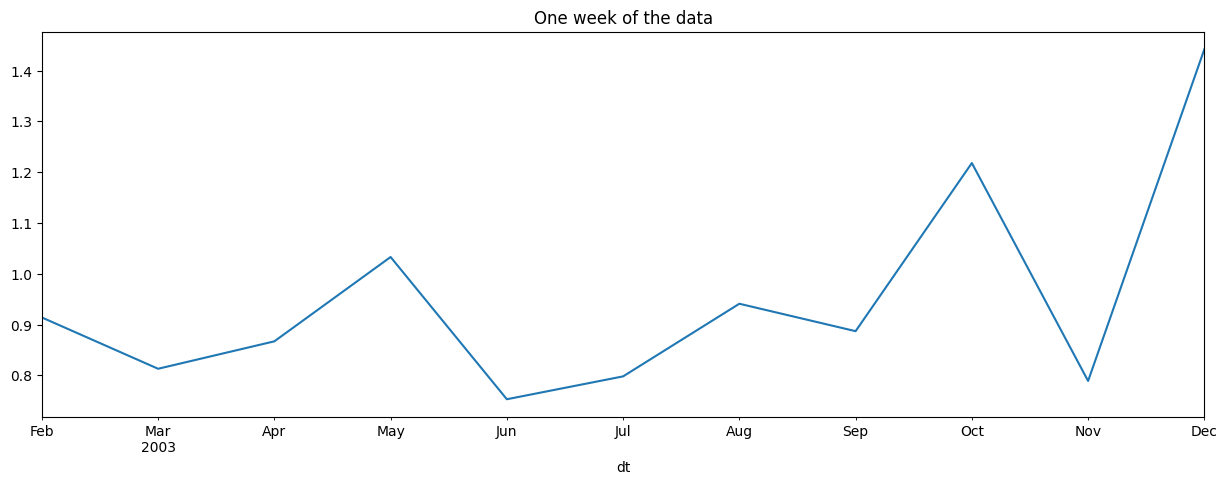

In [110]:
# Plot the energy consumption between 1/1/2003 and 1/8/2003 
df.World.loc[(df.index > '01-01-2003') & (df.index < '01-01-2004')].plot(figsize=(15,5),title="One week of the data")
plt.show()

In [111]:
df.describe()

,India,Japan,Netherlands,World
count,708.000000,708.000000,708.000000,708.000000
mean,0.215900,0.320606,0.672929,0.525314
std,0.615372,0.927462,1.753222,0.583313
min,-1.735000,-2.753000,-7.121000,-1.306000
25%,-0.200000,-0.288000,-0.365750,0.089750
50%,0.207500,0.327000,0.634500,0.462000
75%,0.600250,0.984000,1.784250,0.964250
max,2.533000,2.929000,6.179000,2.624000


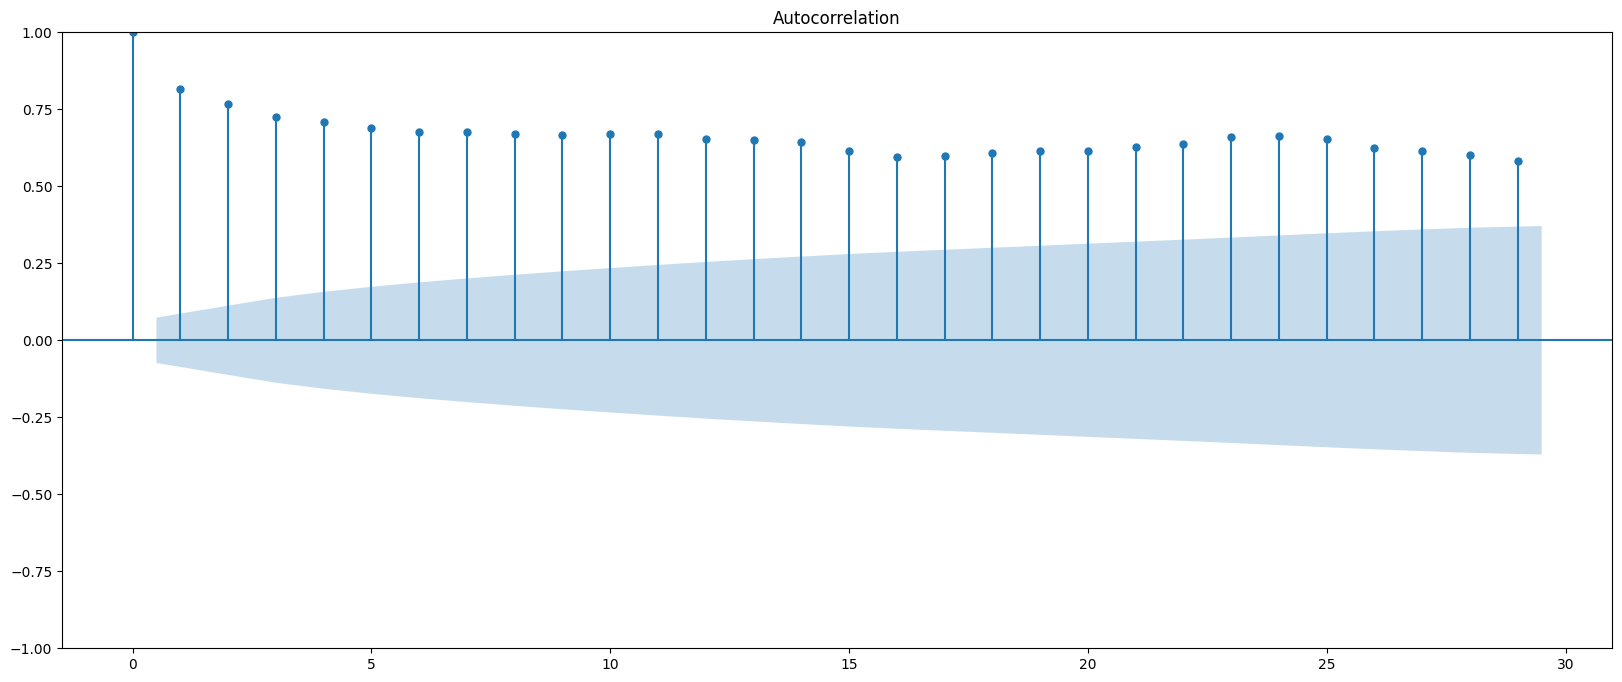

In [113]:
# Plot the ACF
fig, ax = plt.subplots(figsize=(20, 8))
plot_acf(df['World'], ax=ax);

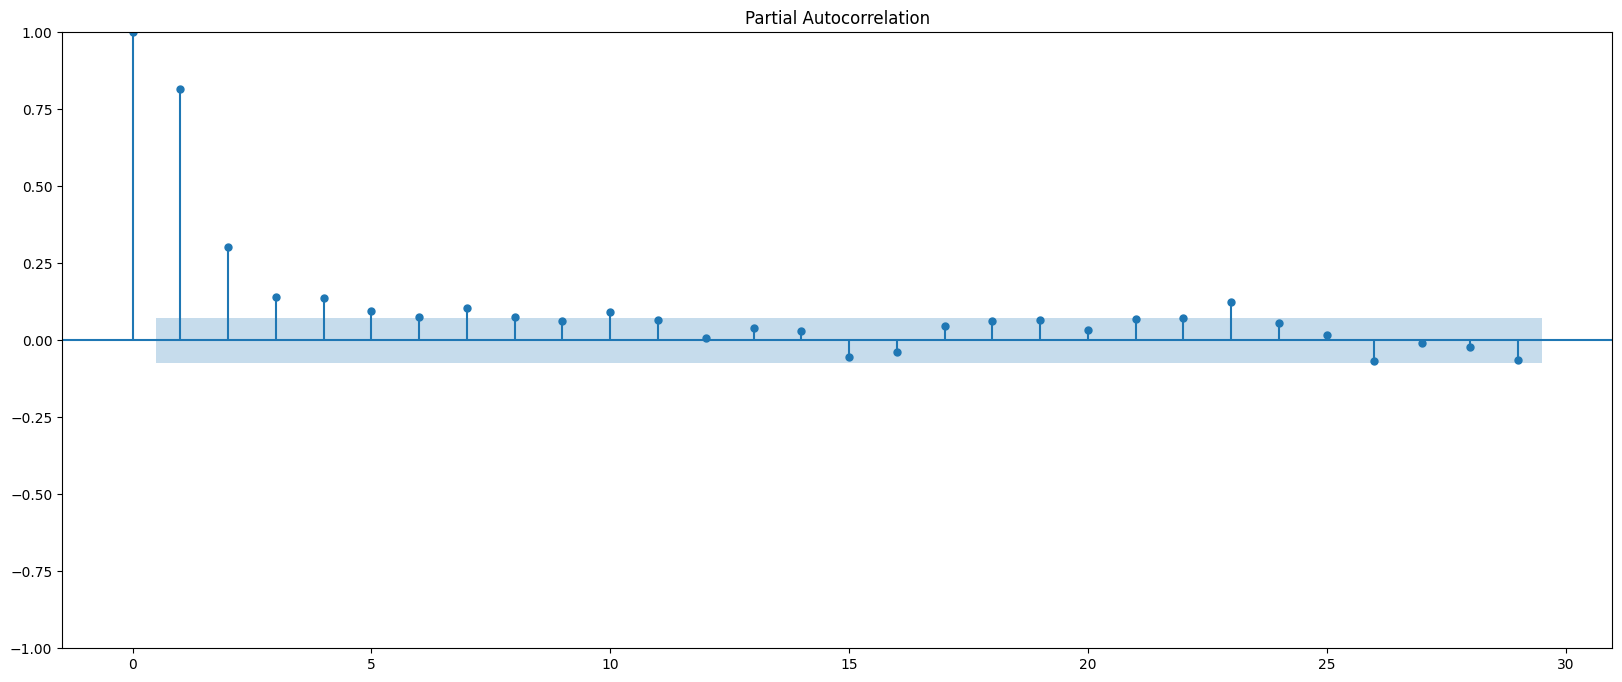

In [114]:
# Plot the PACF
fig, ax = plt.subplots(figsize=(20, 8))
plot_pacf(df['World'], ax=ax);

In [125]:
df

,India,Japan,Netherlands,World,hour,month,year
dt,,,,,,,
1961-01-01,0.536,-0.981,-0.009,0.399,1961-01-01,1961-01-01,1961-01-01
1961-02-01,-1.413,-0.628,4.082,0.263,1961-02-01,1961-02-01,1961-02-01
1961-03-01,0.499,0.600,2.540,0.254,1961-03-01,1961-03-01,1961-03-01
1961-04-01,0.026,0.761,2.735,0.278,1961-04-01,1961-04-01,1961-04-01
1961-05-01,-0.144,0.989,-1.141,0.367,1961-05-01,1961-05-01,1961-05-01
...,...,...,...,...,...,...,...
2019-08-01,0.751,0.903,2.685,1.201,2019-08-01,2019-08-01,2019-08-01
2019-09-01,0.445,1.852,0.767,1.415,2019-09-01,2019-09-01,2019-09-01
2019-10-01,0.267,2.028,1.634,1.545,2019-10-01,2019-10-01,2019-10-01


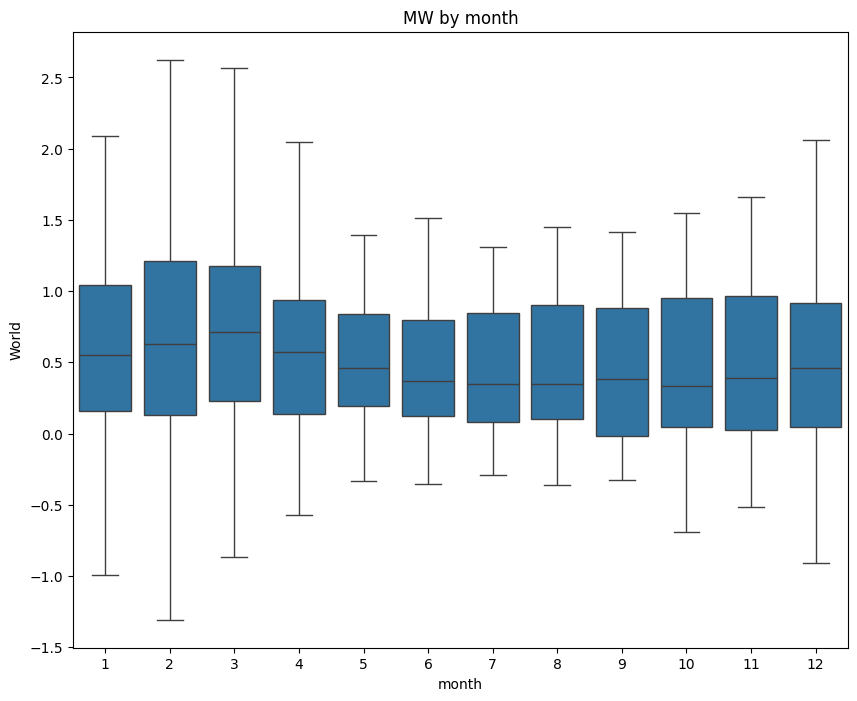

In [128]:
# Extract the hour from the datetime index and create a new 'month' column
df['month'] = df.index.month

# Create a figure and axis for the plot with specified size
fig, ax = plt.subplots(figsize=(10, 8))

# Create a boxplot using seaborn
# x='month' sets the x-axis to the hour column
# y='PJME_MW' sets the y-axis to the PJMW_MW column
sns.boxplot(data=df, x='month', y='World', ax=ax)

# Set the title of the plot
ax.set_title('MW by month')

# Display the plot
plt.show()

In [130]:
# Resample the data to daily frequency, aggregating by sum
df_daily = df.World.resample('D').sum()

# Display the first few rows of the resampled DataFrame
df_daily

dt
1961-01-01    0.399
1961-01-02    0.000
1961-01-03    0.000
1961-01-04    0.000
1961-01-05    0.000
              ...  
2019-11-27    0.000
2019-11-28    0.000
2019-11-29    0.000
2019-11-30    0.000
2019-12-01    1.880
Freq: D, Name: World, Length: 21519, dtype: float64

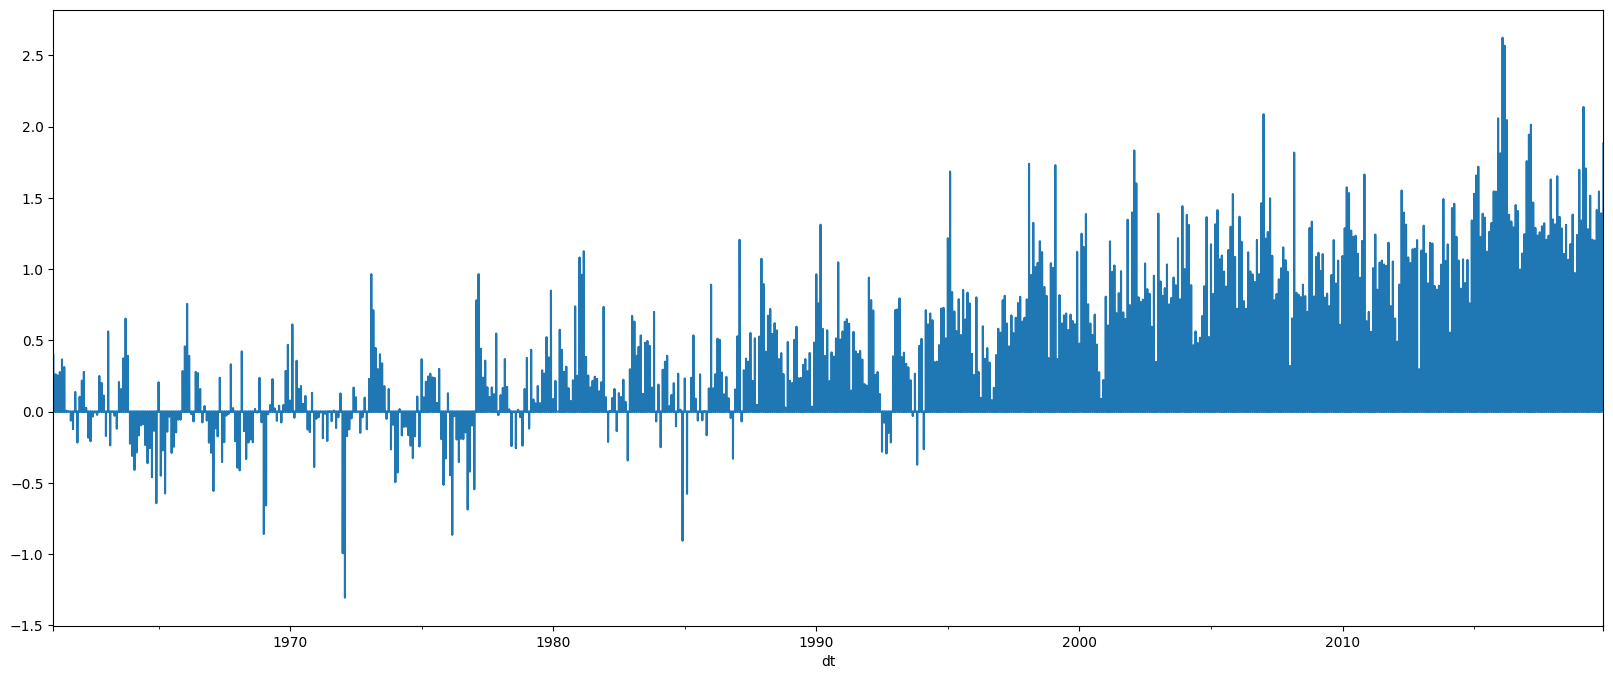

In [131]:
df_daily.plot(figsize=(20, 8));

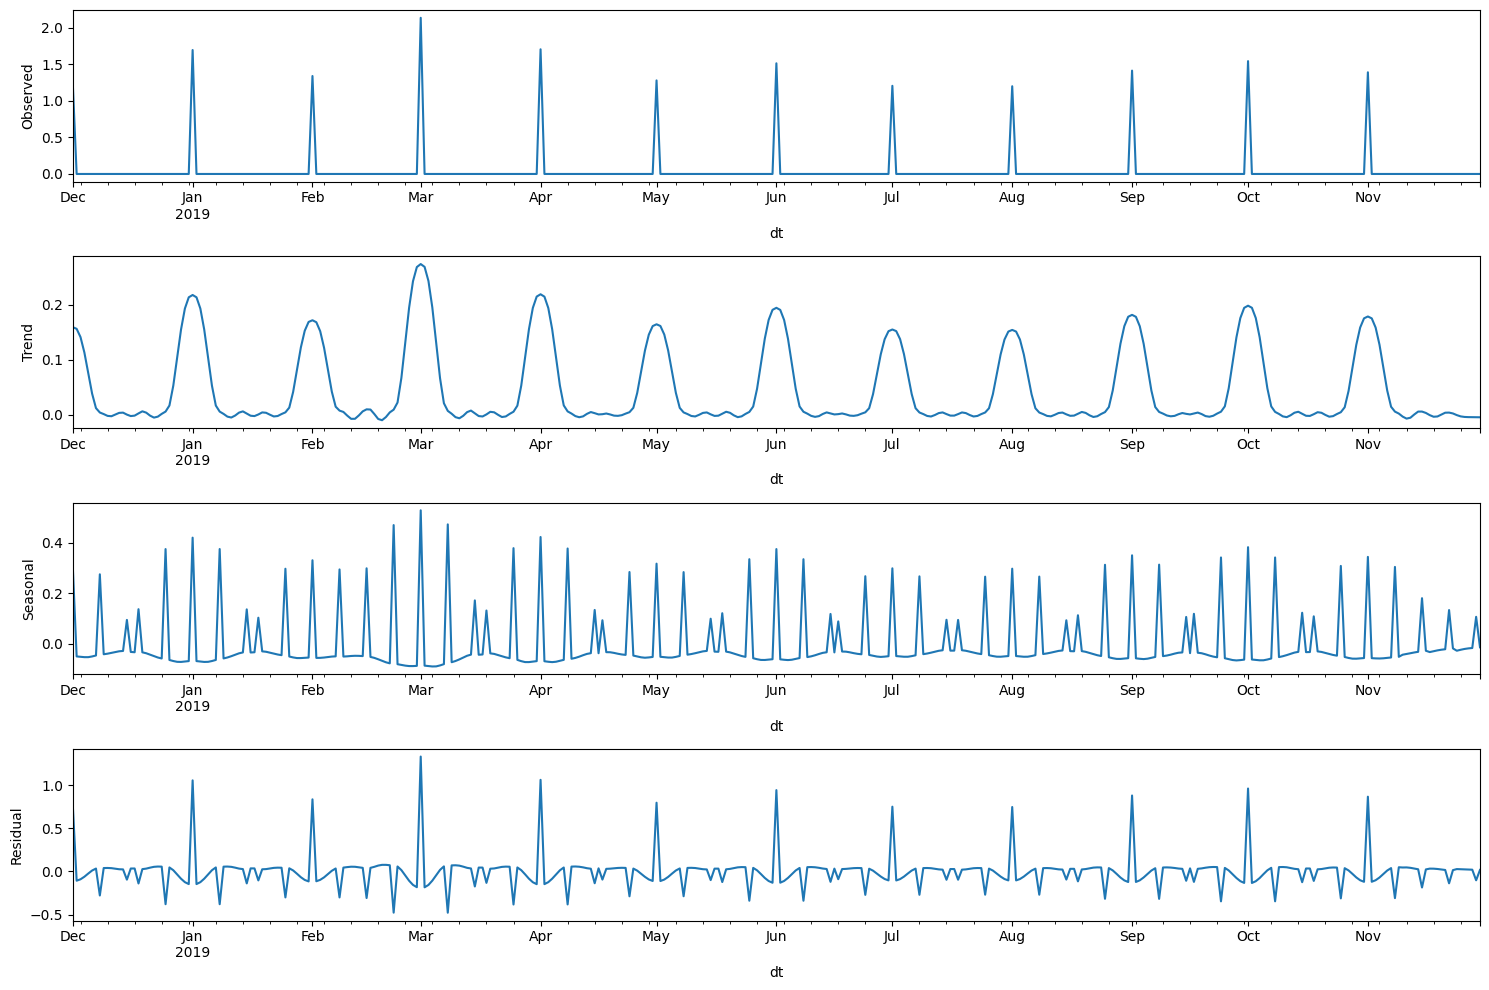

In [132]:
# Perform STL decomposition
stl = STL(df_daily[:-1])  # I removed the last observation because it was like an outlier.
result = stl.fit()

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10))

# Observed data
result.observed[-365:].plot(ax=ax1)
ax1.set_ylabel('Observed')

# Trend component
result.trend[-365:].plot(ax=ax2)
ax2.set_ylabel('Trend')

# Seasonal component
result.seasonal[-365:].plot(ax=ax3)
ax3.set_ylabel('Seasonal')

# Residual component
result.resid[-365:].plot(ax=ax4)
ax4.set_ylabel('Residual')

plt.tight_layout()
plt.show()

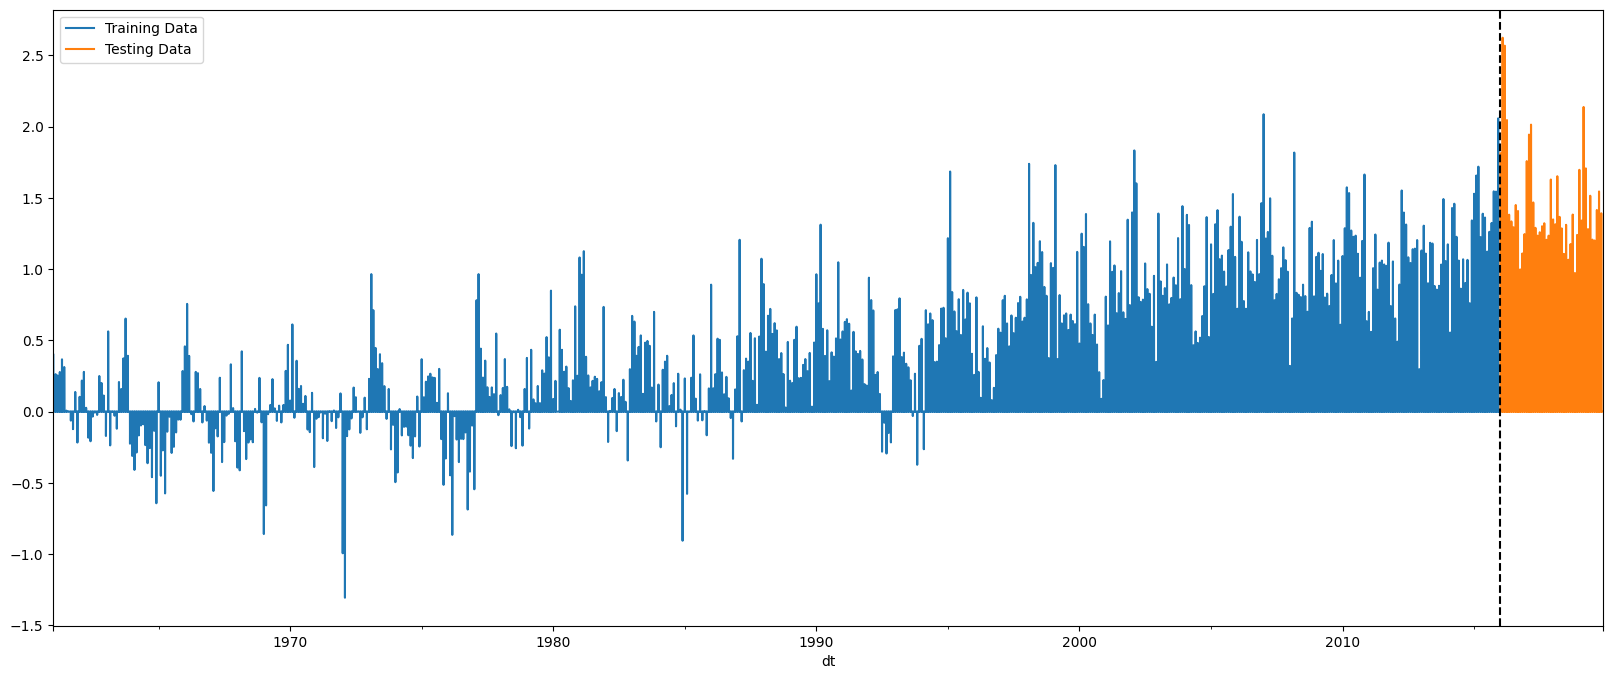

In [133]:
df_daily = df_daily[:-1]
# Convert Series to DataFrame
df_daily = df_daily.to_frame()

# Split the dataset into training and testing sets based on the date
train = df_daily.loc[df_daily.index < '2016-01-01']
test = df_daily.loc[df_daily.index >= '2016-01-01']
# Create a plot with a specified size
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the training set
train.plot(ax=ax, label='Training Set')

# Plot the testing set
test.plot(ax=ax, label='Testing Set')

# Add a vertical line at the end of the training date
ax.axvline('2016-01-01', color='black', ls='--')

# Add a legend to the plot
ax.legend(['Training Data', 'Testing Data'])

# Display the plot
plt.show()

In [134]:
def feature_engineering(dataframe):
    """
    Create time-based features from the datetime index of the DataFrame.
    
    Parameters:
    df (DataFrame): The input DataFrame with a datetime index.
    
    Returns:
    DataFrame: A new DataFrame with additional time-based features.
    """
    new_df = dataframe.copy()  # Create a copy of the DataFrame to avoid modifying the original
    new_df['dayofweek'] = dataframe.index.dayofweek
    new_df['quarter'] = dataframe.index.quarter
    new_df['month'] = dataframe.index.month
    new_df['year'] = dataframe.index.year
    new_df['dayofyear'] = dataframe.index.dayofyear
    return new_df

# Apply the feature creation function to the DataFrame
df_eng = feature_engineering(df_daily)

In [135]:
df_eng

,World,dayofweek,quarter,month,year,dayofyear
dt,,,,,,
1961-01-01,0.399,6,1,1,1961,1
1961-01-02,0.000,0,1,1,1961,2
1961-01-03,0.000,1,1,1,1961,3
1961-01-04,0.000,2,1,1,1961,4
1961-01-05,0.000,3,1,1,1961,5
...,...,...,...,...,...,...
2019-11-26,0.000,1,4,11,2019,330
2019-11-27,0.000,2,4,11,2019,331
2019-11-28,0.000,3,4,11,2019,332


In [136]:
train

,World
dt,
1961-01-01,0.399
1961-01-02,0.000
1961-01-03,0.000
1961-01-04,0.000
1961-01-05,0.000
...,...
2015-12-27,0.000
2015-12-28,0.000
2015-12-29,0.000


In [137]:
# split a univariate sequence into samples (input and output)
def split_sequence(sequence, n_steps):
    X = [sequence[i:i+n_steps] for i in range(len(sequence) - n_steps)]
    y = [sequence[i+n_steps] for i in range(len(sequence) - n_steps)]
    return np.array(X), np.array(y)

In [138]:
# Call the function 'split_sequence' with the list of values and a window size of 7
# The function will return two arrays:
# - X: containing the input sequences, each of length 7
# - y: containing the corresponding target values (the value immediately following each input sequence)
X, y = split_sequence(df_eng['PJMW_MW'].tolist(), 7)

KeyError: 'PJMW_MW'

In [ ]:
X

array([[121237., 127450., 127822., ..., 136467., 128827., 116395.],
       [127450., 127822., 136099., ..., 128827., 116395., 126813.],
       [127822., 136099., 136467., ..., 116395., 126813., 123266.],
       ...,
       [147424., 144869., 149195., ..., 131659., 127052., 131825.],
       [144869., 149195., 143490., ..., 127052., 131825., 135858.],
       [149195., 143490., 131659., ..., 131825., 135858., 143033.]])

In [ ]:
y

array([126813., 123266., 124120., ..., 135858., 143033., 139321.])

In [ ]:
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)   # 60% training, 20% testing, and 20% validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Set the random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Define the model
model_1 = Sequential()

# Add a dense (fully connected) layer (single hidden layer) with 100 neurons and ReLU activation function
# input_dim is set to n_steps, the number of input observations
model_1.add(Dense(100, activation='relu', input_dim=7))

# Add an output layer with a single neuron (single-step forecasting)
model_1.add(Dense(1))

# Compile the model using Adam optimizer and mean squared error (mse) loss function
model_1.compile(optimizer='adam', loss='mse')

# fit model
history_1 = model_1.fit(X_train, y_train, epochs=2000, verbose=1, validation_data=(X_val, y_val))

Epoch 1/2000
112/112 [==============================] - 0s 2ms/step - loss: 118261840.0000 - val_loss: 90541864.0000
Epoch 2/2000
112/112 [==============================] - 0s 1ms/step - loss: 88298784.0000 - val_loss: 76752920.0000
Epoch 3/2000
112/112 [==============================] - 0s 1ms/step - loss: 83106240.0000 - val_loss: 92136832.0000
Epoch 4/2000
112/112 [==============================] - 0s 2ms/step - loss: 79107568.0000 - val_loss: 80370872.0000
Epoch 5/2000
112/112 [==============================] - 0s 1ms/step - loss: 75288024.0000 - val_loss: 70267024.0000
Epoch 6/2000
112/112 [==============================] - 0s 1ms/step - loss: 72004688.0000 - val_loss: 70131520.0000
Epoch 7/2000
112/112 [==============================] - 0s 1ms/step - loss: 73327520.0000 - val_loss: 68144264.0000
Epoch 8/2000
112/112 [==============================] - 0s 1ms/step - loss: 70079832.0000 - val_loss: 74146536.0000
Epoch 9/2000
112/112 [==============================] - 0s 1ms/step - l

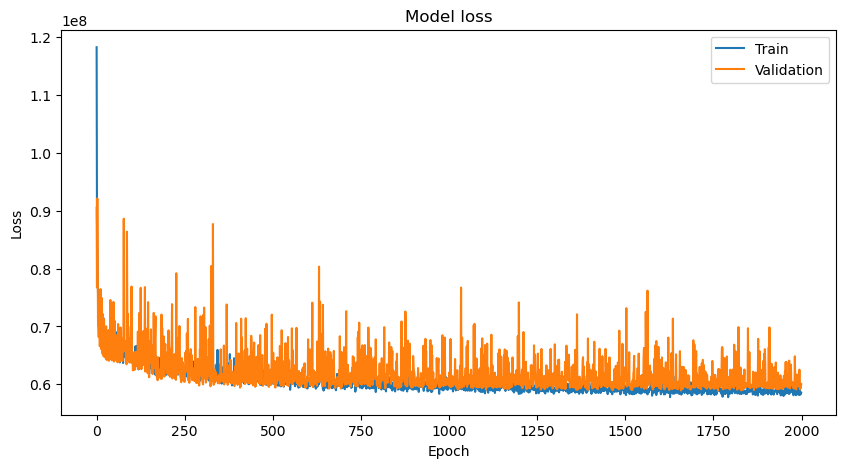

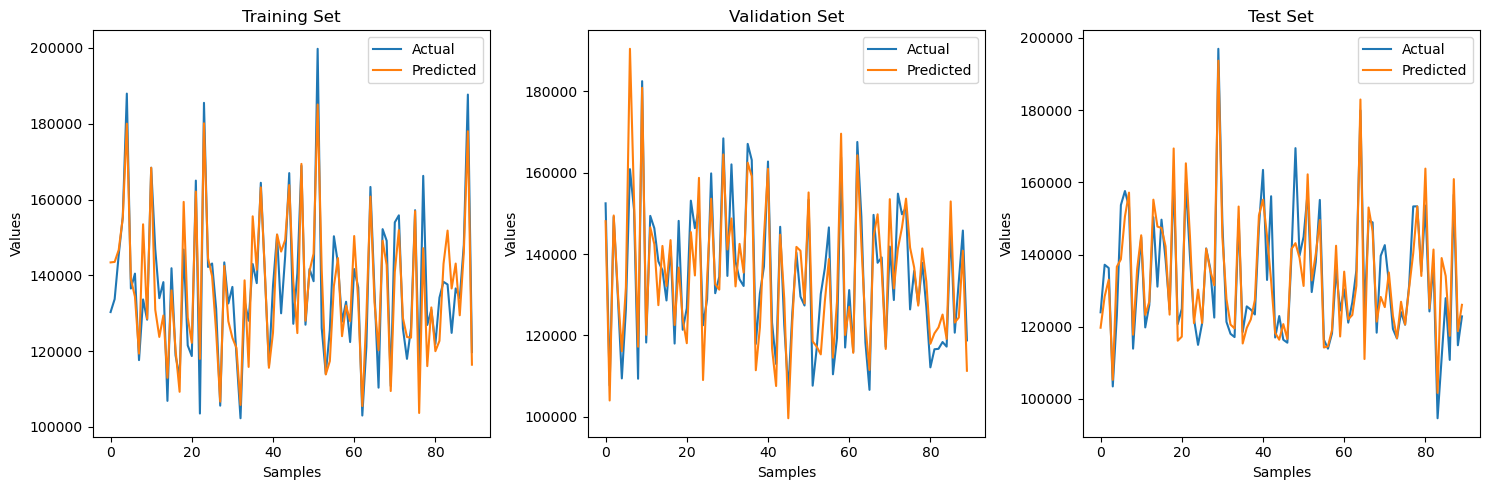

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Predict values
y_train_pred = model_1.predict(X_train)
y_val_pred = model_1.predict(X_val)
y_test_pred = model_1.predict(X_test)

# Plot predictions vs actual values
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.plot(y_train[-90:], label='Actual')
plt.plot(y_train_pred[-90:], label='Predicted')
plt.title('Training Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Validation set
plt.subplot(1, 3, 2)
plt.plot(y_val[-90:], label='Actual')
plt.plot(y_val_pred[-90:], label='Predicted')
plt.title('Validation Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Test set
plt.subplot(1, 3, 3)
plt.plot(y_test[-90:], label='Actual')
plt.plot(y_test_pred[-90:], label='Predicted')
plt.title('Test Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on the validation set and calculate RMSE
val_predictions = model_1.predict(X_val)
val_mse = mean_squared_error(y_val, val_predictions)
val_rmse = np.sqrt(val_mse)
print(f'Validation RMSE for Dense Model: {val_rmse}')

# Evaluate the model on the test set and calculate RMSE
test_predictions = model_1.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
print(f'Test RMSE for Dense Model: {test_rmse}')

Validation RMSE for Dense Model: 7750.93965142232
Test RMSE for Dense Model: 8176.559884756022


In [ ]:
# Evaluate the model on the validation set and calculate MAPE
val_mape = mean_absolute_percentage_error(y_val, val_predictions)
print(f'Validation MAPE for Dense Model: {val_mape:.2%}')

# Evaluate the model on the test set and calculate MAPE
test_mape = mean_absolute_percentage_error(y_test, test_predictions)
print(f'Test MAPE for Dense Model: {test_mape:.2%}')

Validation MAPE for Dense Model: 4.34%
Test MAPE for Dense Model: 4.49%


### Using Multivariate MLP Model

In [ ]:
df_eng

,PJMW_MW,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,
2002-04-01,121237.0,0,2,4,2002,91
2002-04-02,127450.0,1,2,4,2002,92
2002-04-03,127822.0,2,2,4,2002,93
2002-04-04,136099.0,3,2,4,2002,94
2002-04-05,136467.0,4,2,4,2002,95
...,...,...,...,...,...,...
2018-07-29,127052.0,6,3,7,2018,210
2018-07-30,131825.0,0,3,7,2018,211
2018-07-31,135858.0,1,3,7,2018,212


In [ ]:
def create_multivariate_data(df, window_size):
    """
    Convert the DataFrame to a multivariate dataset for MLP with a sliding window approach.
    
    Parameters:
    df (DataFrame): The input DataFrame.
    window_size (int): The size of the sliding window (e.g., 7 for a week).
    
    Returns:
    X, y (numpy arrays): Multivariate input features and target values.
    """
    X, y = [], []
    for i in range(len(df) - window_size):
        X.append(df.iloc[i:i + window_size].values)
        y.append(df.iloc[i + window_size]['PJMW_MW'])
    return np.array(X), np.array(y)

In [ ]:
X, y = create_multivariate_data(df_eng, 7)

In [ ]:
X[0]

array([[1.21237e+05, 0.00000e+00, 2.00000e+00, 4.00000e+00, 2.00200e+03,
        9.10000e+01],
       [1.27450e+05, 1.00000e+00, 2.00000e+00, 4.00000e+00, 2.00200e+03,
        9.20000e+01],
       [1.27822e+05, 2.00000e+00, 2.00000e+00, 4.00000e+00, 2.00200e+03,
        9.30000e+01],
       [1.36099e+05, 3.00000e+00, 2.00000e+00, 4.00000e+00, 2.00200e+03,
        9.40000e+01],
       [1.36467e+05, 4.00000e+00, 2.00000e+00, 4.00000e+00, 2.00200e+03,
        9.50000e+01],
       [1.28827e+05, 5.00000e+00, 2.00000e+00, 4.00000e+00, 2.00200e+03,
        9.60000e+01],
       [1.16395e+05, 6.00000e+00, 2.00000e+00, 4.00000e+00, 2.00200e+03,
        9.70000e+01]])

In [ ]:
y[0]

126813.0

In [ ]:
# Before we can fit an MLP on this data, we must flatten the shape of the input samples. 
# MLPs require that the shape of the input portion of each sample is a vector.
# flatten input
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))

In [ ]:
X[0]

array([1.21237e+05, 0.00000e+00, 2.00000e+00, 4.00000e+00, 2.00200e+03,
       9.10000e+01, 1.27450e+05, 1.00000e+00, 2.00000e+00, 4.00000e+00,
       2.00200e+03, 9.20000e+01, 1.27822e+05, 2.00000e+00, 2.00000e+00,
       4.00000e+00, 2.00200e+03, 9.30000e+01, 1.36099e+05, 3.00000e+00,
       2.00000e+00, 4.00000e+00, 2.00200e+03, 9.40000e+01, 1.36467e+05,
       4.00000e+00, 2.00000e+00, 4.00000e+00, 2.00200e+03, 9.50000e+01,
       1.28827e+05, 5.00000e+00, 2.00000e+00, 4.00000e+00, 2.00200e+03,
       9.60000e+01, 1.16395e+05, 6.00000e+00, 2.00000e+00, 4.00000e+00,
       2.00200e+03, 9.70000e+01])

In [ ]:
len(X[0])     # no of variables x no of time steps = 6 x 7

42

In [ ]:
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)   # 60% training, 20% testing, and 20% validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Set the random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Define the model
model_2 = Sequential()

# Add a dense (fully connected) layer (single hidden layer) with 100 neurons and ReLU activation function
# input_dim is set to n_steps, the number of input observations
model_2.add(Dense(100, activation='relu', input_dim=n_input))

# Add an output layer with a single neuron (single-step forecasting)
model_2.add(Dense(1))

# Compile the model using Adam optimizer and mean squared error (mse) loss function
model_2.compile(optimizer='adam', loss='mse')

# fit model
history_2 = model_2.fit(X_train, y_train, epochs=2000, verbose=1, validation_data=(X_val, y_val))

Epoch 1/2000
112/112 [==============================] - 0s 3ms/step - loss: 487419680.0000 - val_loss: 131936752.0000
Epoch 2/2000
112/112 [==============================] - 0s 1ms/step - loss: 129515248.0000 - val_loss: 115839280.0000
Epoch 3/2000
112/112 [==============================] - 0s 1ms/step - loss: 110409176.0000 - val_loss: 95112456.0000
Epoch 4/2000
112/112 [==============================] - 0s 2ms/step - loss: 95293592.0000 - val_loss: 92730984.0000
Epoch 5/2000
112/112 [==============================] - 0s 1ms/step - loss: 86482840.0000 - val_loss: 80013600.0000
Epoch 6/2000
112/112 [==============================] - 0s 2ms/step - loss: 78793056.0000 - val_loss: 74127552.0000
Epoch 7/2000
112/112 [==============================] - 0s 1ms/step - loss: 76798416.0000 - val_loss: 74300776.0000
Epoch 8/2000
112/112 [==============================] - 0s 2ms/step - loss: 72844896.0000 - val_loss: 71707232.0000
Epoch 9/2000
112/112 [==============================] - 0s 1ms/step

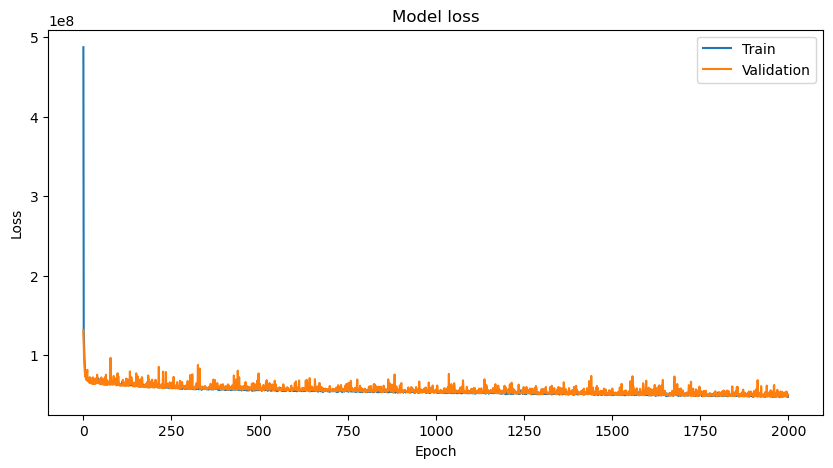

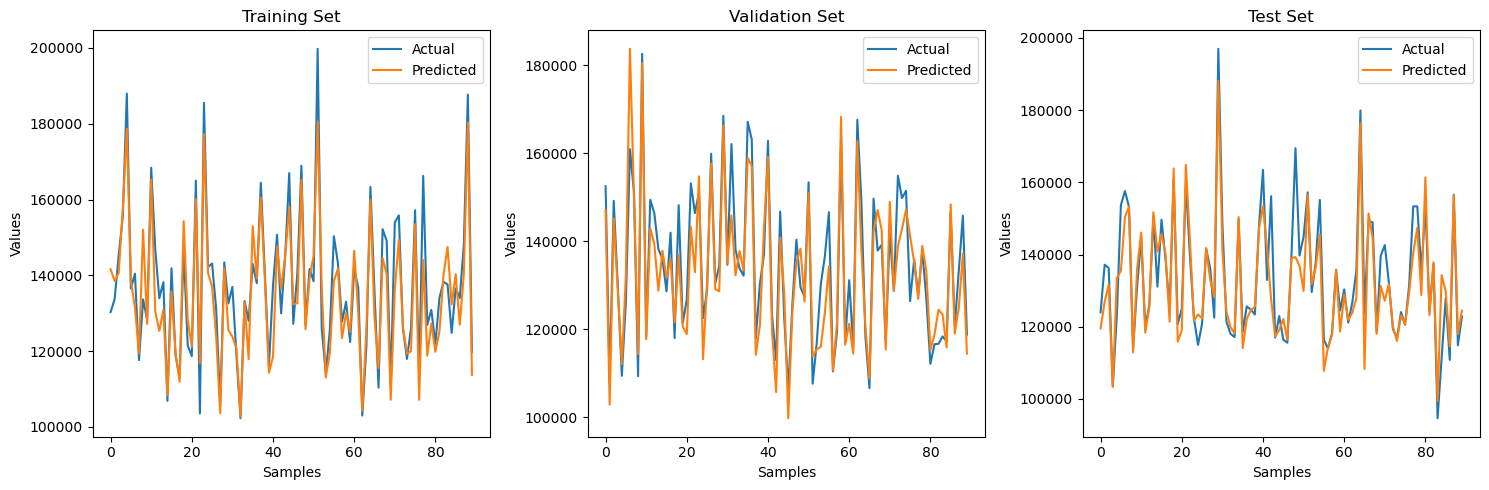

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Predict values
y_train_pred = model_2.predict(X_train)
y_val_pred = model_2.predict(X_val)
y_test_pred = model_2.predict(X_test)

# Plot predictions vs actual values
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.plot(y_train[-90:], label='Actual')
plt.plot(y_train_pred[-90:], label='Predicted')
plt.title('Training Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Validation set
plt.subplot(1, 3, 2)
plt.plot(y_val[-90:], label='Actual')
plt.plot(y_val_pred[-90:], label='Predicted')
plt.title('Validation Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Test set
plt.subplot(1, 3, 3)
plt.plot(y_test[-90:], label='Actual')
plt.plot(y_test_pred[-90:], label='Predicted')
plt.title('Test Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on the validation set and calculate RMSE
val_predictions = model_2.predict(X_val)
val_mse = mean_squared_error(y_val, val_predictions)
val_rmse = np.sqrt(val_mse)
print(f'Validation RMSE for Dense Model: {val_rmse}')

# Evaluate the model on the test set and calculate RMSE
test_predictions = model_2.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
print(f'Test RMSE for Dense Model: {test_rmse}')

Validation RMSE for Dense Model: 7134.519026881657
Test RMSE for Dense Model: 7693.049143517225


In [ ]:
# Evaluate the model on the validation set and calculate MAPE
val_mape = mean_absolute_percentage_error(y_val, val_predictions)
print(f'Validation MAPE for Dense Model: {val_mape:.2%}')

# Evaluate the model on the test set and calculate MAPE
test_mape = mean_absolute_percentage_error(y_test, test_predictions)
print(f'Test MAPE for Dense Model: {test_mape:.2%}')

Validation MAPE for Dense Model: 3.91%
Test MAPE for Dense Model: 4.02%


### Using Multi-headed MILP

In [ ]:
df_eng

,PJMW_MW,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,
2002-04-01,121237.0,0,2,4,2002,91
2002-04-02,127450.0,1,2,4,2002,92
2002-04-03,127822.0,2,2,4,2002,93
2002-04-04,136099.0,3,2,4,2002,94
2002-04-05,136467.0,4,2,4,2002,95
...,...,...,...,...,...,...
2018-07-29,127052.0,6,3,7,2018,210
2018-07-30,131825.0,0,3,7,2018,211
2018-07-31,135858.0,1,3,7,2018,212


In [ ]:
X, y = create_multivariate_data(df_eng, 7)

In [ ]:
X[0]

array([[1.21237e+05, 0.00000e+00, 2.00000e+00, 4.00000e+00, 2.00200e+03,
        9.10000e+01],
       [1.27450e+05, 1.00000e+00, 2.00000e+00, 4.00000e+00, 2.00200e+03,
        9.20000e+01],
       [1.27822e+05, 2.00000e+00, 2.00000e+00, 4.00000e+00, 2.00200e+03,
        9.30000e+01],
       [1.36099e+05, 3.00000e+00, 2.00000e+00, 4.00000e+00, 2.00200e+03,
        9.40000e+01],
       [1.36467e+05, 4.00000e+00, 2.00000e+00, 4.00000e+00, 2.00200e+03,
        9.50000e+01],
       [1.28827e+05, 5.00000e+00, 2.00000e+00, 4.00000e+00, 2.00200e+03,
        9.60000e+01],
       [1.16395e+05, 6.00000e+00, 2.00000e+00, 4.00000e+00, 2.00200e+03,
        9.70000e+01]])

In [ ]:
X1 = X[:, :, 0]
X2 = X[:, :, 1]
X3 = X[:, :, 2]
X4 = X[:, :, 3]
X5 = X[:, :, 4]
X6 = X[:, :, 5]

In [ ]:
X1

array([[121237., 127450., 127822., ..., 136467., 128827., 116395.],
       [127450., 127822., 136099., ..., 128827., 116395., 126813.],
       [127822., 136099., 136467., ..., 116395., 126813., 123266.],
       ...,
       [147424., 144869., 149195., ..., 131659., 127052., 131825.],
       [144869., 149195., 143490., ..., 127052., 131825., 135858.],
       [149195., 143490., 131659., ..., 131825., 135858., 143033.]])

In [ ]:
X6

array([[ 91.,  92.,  93., ...,  95.,  96.,  97.],
       [ 92.,  93.,  94., ...,  96.,  97.,  98.],
       [ 93.,  94.,  95., ...,  97.,  98.,  99.],
       ...,
       [205., 206., 207., ..., 209., 210., 211.],
       [206., 207., 208., ..., 210., 211., 212.],
       [207., 208., 209., ..., 211., 212., 213.]])

In [ ]:
# Split data into training, validation, and test sets (60% training, 20% validation, 20% testing)
X1_train, X1_temp, y_train, y_temp = train_test_split(X1, y, test_size=0.4, random_state=seed)
X1_val, X1_test, y_val, y_test = train_test_split(X1_temp, y_temp, test_size=0.5, random_state=seed)

X2_train, X2_temp, _, _ = train_test_split(X2, y, test_size=0.4, random_state=seed)
X2_val, X2_test, _, _ = train_test_split(X2_temp, y_temp, test_size=0.5, random_state=seed)

X3_train, X3_temp, _, _ = train_test_split(X3, y, test_size=0.4, random_state=seed)
X3_val, X3_test, _, _ = train_test_split(X3_temp, y_temp, test_size=0.5, random_state=seed)

X4_train, X4_temp, _, _ = train_test_split(X4, y, test_size=0.4, random_state=seed)
X4_val, X4_test, _, _ = train_test_split(X4_temp, y_temp, test_size=0.5, random_state=seed)

X5_train, X5_temp, _, _ = train_test_split(X5, y, test_size=0.4, random_state=seed)
X5_val, X5_test, _, _ = train_test_split(X5_temp, y_temp, test_size=0.5, random_state=seed)

X6_train, X6_temp, _, _ = train_test_split(X6, y, test_size=0.4, random_state=seed)
X6_val, X6_test, _, _ = train_test_split(X6_temp, y_temp, test_size=0.5, random_state=seed)

In [ ]:
# Set the random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed) 

# Define the number of time steps
n_steps = 7

# First input model
visible1 = Input(shape=(n_steps,))
dense1 = Dense(100, activation='relu')(visible1)

# Second input model
visible2 = Input(shape=(n_steps,))
dense2 = Dense(100, activation='relu')(visible2)

# Third input model
visible3 = Input(shape=(n_steps,))
dense3 = Dense(100, activation='relu')(visible3)

# Fourth input model
visible4 = Input(shape=(n_steps,))
dense4 = Dense(100, activation='relu')(visible4)

# Fifth input model
visible5 = Input(shape=(n_steps,))
dense5 = Dense(100, activation='relu')(visible5)

# Sixth input model
visible6 = Input(shape=(n_steps,))
dense6 = Dense(100, activation='relu')(visible6)

# Merge input models
merged = concatenate([dense1, dense2, dense3, dense4, dense5, dense6])
output = Dense(1)(merged)

# Create and compile the model
model_3 = Model(inputs=[visible1, visible2, visible3, visible4, visible5, visible6], outputs=output)
model_3.compile(optimizer='adam', loss='mse')

# Fit the model
history_3 = model_3.fit(
    [X1_train, X2_train, X3_train, X4_train, X5_train, X6_train], y_train, 
    epochs=1000, verbose=1, 
    validation_data=([X1_val, X2_val, X3_val, X4_val, X5_val, X6_val], y_val)
)

Epoch 1/1000
112/112 [==============================] - 0s 3ms/step - loss: 3020887040.0000 - val_loss: 133557160.0000
Epoch 2/1000
112/112 [==============================] - 0s 2ms/step - loss: 135444112.0000 - val_loss: 125931728.0000
Epoch 3/1000
112/112 [==============================] - 0s 2ms/step - loss: 127423664.0000 - val_loss: 118369768.0000
Epoch 4/1000
112/112 [==============================] - 0s 2ms/step - loss: 120738096.0000 - val_loss: 111228600.0000
Epoch 5/1000
112/112 [==============================] - 0s 2ms/step - loss: 112519120.0000 - val_loss: 106357848.0000
Epoch 6/1000
112/112 [==============================] - 0s 2ms/step - loss: 104954128.0000 - val_loss: 96961816.0000
Epoch 7/1000
112/112 [==============================] - 0s 2ms/step - loss: 96777312.0000 - val_loss: 88546552.0000
Epoch 8/1000
112/112 [==============================] - 0s 2ms/step - loss: 90248256.0000 - val_loss: 83091256.0000
Epoch 9/1000
112/112 [==============================] - 0s 2

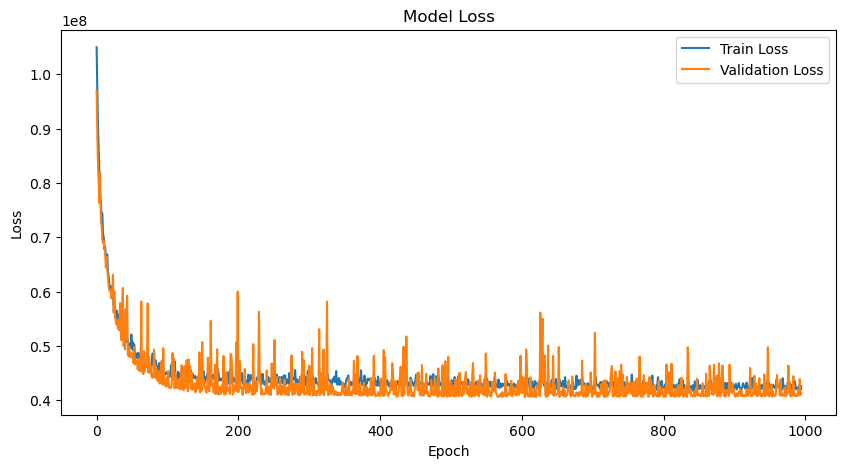

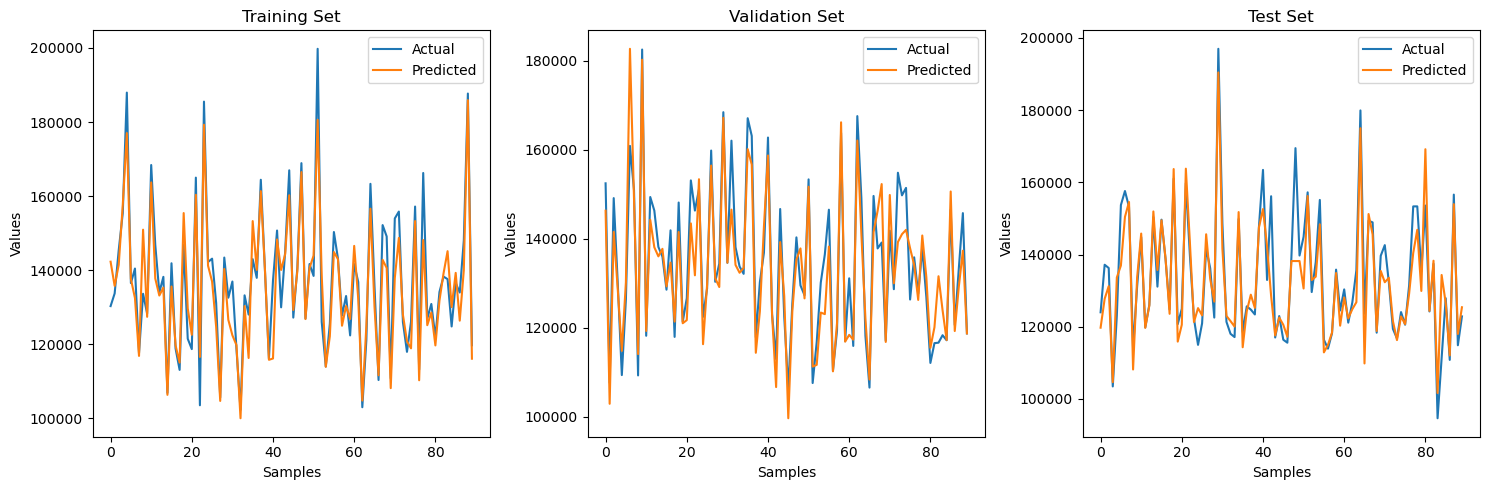

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history_3.history['loss'][5:], label='Train Loss')
plt.plot(history_3.history['val_loss'][5:], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Predict values
y_train_pred = model_3.predict([X1_train, X2_train, X3_train, X4_train, X5_train, X6_train])
y_val_pred = model_3.predict([X1_val, X2_val, X3_val, X4_val, X5_val, X6_val])
y_test_pred = model_3.predict([X1_test, X2_test, X3_test, X4_test, X5_test, X6_test])

# Plot predictions vs actual values
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.plot(y_train[-90:], label='Actual')
plt.plot(y_train_pred[-90:], label='Predicted')
plt.title('Training Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Validation set
plt.subplot(1, 3, 2)
plt.plot(y_val[-90:], label='Actual')
plt.plot(y_val_pred[-90:], label='Predicted')
plt.title('Validation Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Test set
plt.subplot(1, 3, 3)
plt.plot(y_test[-90:], label='Actual')
plt.plot(y_test_pred[-90:], label='Predicted')
plt.title('Test Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on the validation set and calculate RMSE
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
print(f'Validation RMSE for Dense Model: {val_rmse}')

# Evaluate the model on the test set and calculate RMSE
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print(f'Test RMSE for Dense Model: {test_rmse}')

Validation RMSE for Dense Model: 6429.4848456174495
Test RMSE for Dense Model: 6983.966390083303


In [ ]:
# Evaluate the model on the validation set and calculate MAPE
val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
print(f'Validation MAPE for Dense Model: {val_mape:.2%}')

# Evaluate the model on the test set and calculate MAPE
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
print(f'Test MAPE for Dense Model: {test_mape:.2%}')

Validation MAPE for Dense Model: 3.48%
Test MAPE for Dense Model: 3.61%
